# Pyber Ride Share Analysis

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [6]:
# Read both data files
file1 = "raw_data/city_data.csv"
city_df = pd.read_csv(file1)
file2 = "raw_data/ride_data.csv"
ride_df = pd.read_csv(file2)
pyber_data_df=pd.merge(city_df,ride_df)
pyber_data_df.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


**Bubble Plot**

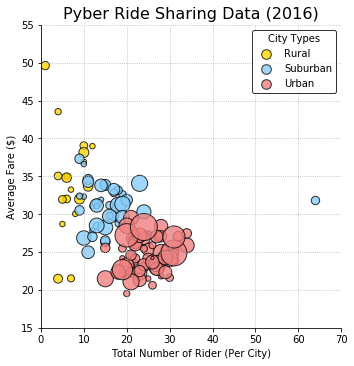

In [22]:
#grouping
type_city_fare_df=pyber_data_df.groupby(["type","city"],as_index=True).mean()["fare"].to_frame().reset_index()
# Grouping by type and city to find number of rides
type_city_ride_id_df=pyber_data_df.groupby(["type","city"],as_index=True).count()["ride_id"].to_frame().reset_index()

# Merging both the DataFrames
bubble_df=pd.merge(type_city_fare_df,type_city_ride_id_df,on=["type","city"])
# Renaming the columns to relevant column name
bubble_df=bubble_df.rename(columns={"ride_id":"no_of_rides","fare":"avg_fare"})

# Setting the size of markers by reading the driver count for each city
size=10*city_df.groupby(["type","city"],as_index=True).sum()["driver_count"]

# Creates the scatter chart based upon the values above
sns.lmplot(x="no_of_rides",y="avg_fare",data=bubble_df,fit_reg=False,hue="type",legend_out=False,
           size=5,scatter_kws={"s": size,'linewidths':1,'edgecolor':'black'},
           palette=dict(Rural="gold", Suburban="lightskyblue", Urban="lightcoral"))

# Setting the legend title, markerscale
plt.legend(title="City Types",loc="best",markerscale=0.5,edgecolor="black")

# Setting the grid style
plt.grid(linestyle="dotted")

# Setting the x_axis and y_axis limits
plt.xlim(0,70)
plt.ylim(15,55)

# Setting the title, x_axis and y_axis labels
plt.title("Pyber Ride Sharing Data (2016)", fontsize=16)
plt.xlabel("Total Number of Rider (Per City)")
plt.ylabel("Average Fare ($)")

# Prints our scatter plot to the screen
plt.show()

**Percentage of Total Fare by City Type**

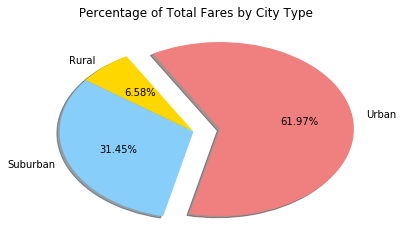

In [23]:
# pie chart label
labels = ["Rural","Suburban","Urban"]
# pychart size
sizes = pyber_data_df.groupby(["type"],as_index=False).sum()["fare"].tolist()
# color setting
colors = ["gold", "lightskyblue", "lightcoral"]
# explode
explode = (0,0,0.2)
#pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%2.2f%%", shadow=True, startangle=120)
#title
plt.title(" Percentage of Total Fares by City Type")
#to show plot
plt.show()

**Percentage of Total Ride by City Type**

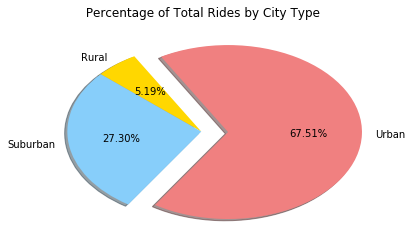

In [24]:
# pie chart label
labels = ["Rural","Suburban","Urban"]
# pychart size
sizes = pyber_data_df.groupby(["type"],as_index=True).count()["ride_id"].tolist()
# color setting
colors = ["gold", "lightskyblue", "lightcoral"]
# explode
explode = (0,0,0.2)
#pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct="%2.2f%%", shadow=True, startangle=120)
#title
plt.title(" Percentage of Total Rides by City Type")
#to show plot
plt.show()

**Percentage of Total Drivers by City Type**

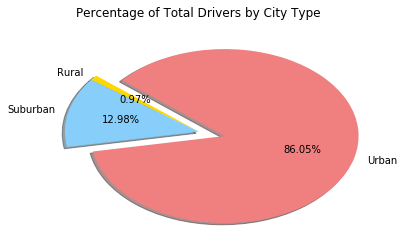

In [25]:
# pie chart label
labels = ["Rural","Suburban","Urban"]
# pychart size
sizes = pyber_data_df.groupby(["type"],as_index=True).sum()["driver_count"]
# color setting
colors = ["gold", "lightskyblue", "lightcoral"]
# explode
explode = (0,0,0.2)
#pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct="%2.2f%%", shadow=True, startangle=140)
#title
plt.title("Percentage of Total Drivers by City Type")
#to show plot
plt.show()